**EPL Winnability Analysis**

> 1. [Introduction](#1)
> 2. [Missing data](#2)
> 3. [Exploratory Data Analysis](#3)
> 4. [What differentiates Top 4 teams?](#4)
> 5. [Goal Analysis: Various kinds of goals](#5)
> 6. [Defense Analysis](#6)

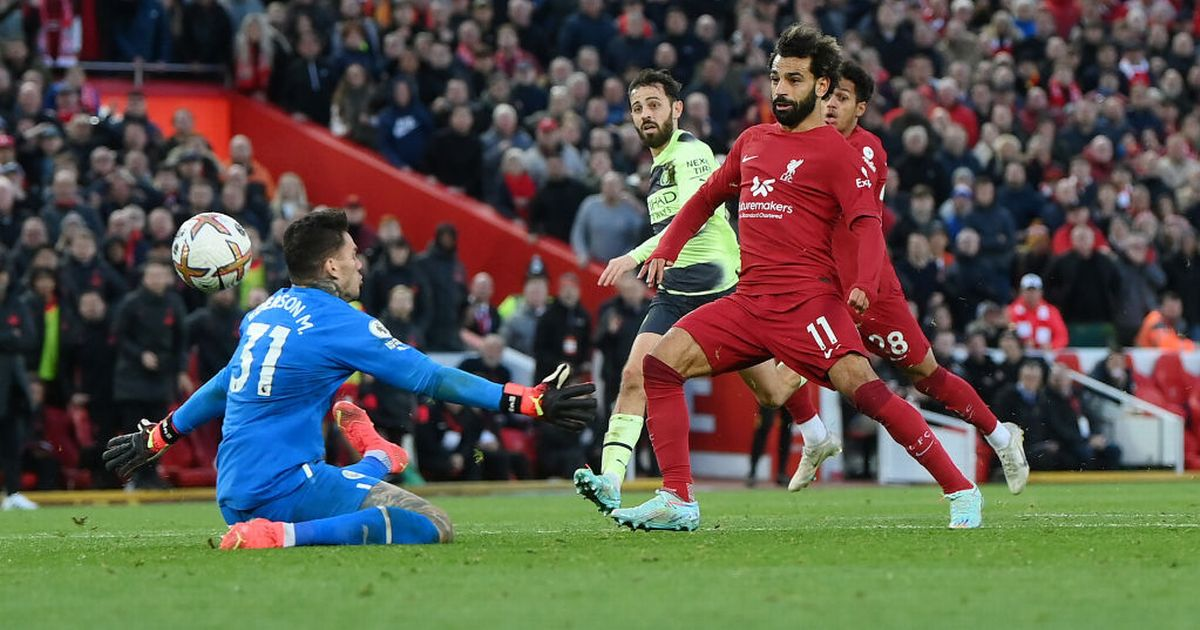

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 150%;
           border-radius:5px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Introduction
<a class="anchor" id="1"></a>

EPL is one of the most followed football leagues in the world. It has a total of 20 teams playing 38 games over a period of 1 year. The team who gets the most point wins the league. 3 points are awarded for a win, 1 each for a draw and 0 for a loss. Each team plays 1 home game & 1 away game against each other team in the league.

**GOAL**

The goal of this notebook is to explore this data and analyze the factors that drive highly successful football teams.

**DATA**

The data comprises 12 seasons starting from 2006-2007 and beyond. The data has two dataframes.

**&rarr; Results dataframe**

Match level data of who played against whom and what the score was for each season

**&rarr; Statistics dataframe**

Various interesting metrics measured for each team accross the season Ex: total number of yellow cards, fouls, attacks, defenses etc.

**<u><font size="3"> Loading data . . . . </font></u>**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
stats_df = pd.read_csv("/kaggle/input/premier-league/stats.csv")
results_df = pd.read_csv("/kaggle/input/premier-league/results.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/premier-league/stats.csv'

In [74]:
print("Shape of STATS DF is", stats_df.shape)
print("Shape of RESULTS DF is", results_df.shape)

Shape of STATS DF is (240, 42)
Shape of RESULTS DF is (4560, 6)


In [75]:
## Statistics dataframe
print("STATS DF - HEAD")
display(stats_df.head())
print("STATS DF - INFO (summary)")
display(stats_df.info(verbose=False))

STATS DF - HEAD


,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,897.0,231.0,24010.0,NaN,2.0,NaN,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,1107.0,282.0,24150.0,NaN,1.0,NaN,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,873.0,278.0,25592.0,NaN,1.0,NaN,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,796.0,181.0,22200.0,NaN,2.0,NaN,0.0,51.0,24.0,2006-2007


STATS DF - INFO (summary)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Columns: 42 entries, team to season
dtypes: float64(40), object(2)
memory usage: 78.9+ KB


None

In [76]:
## Results Dataframe
print("RESULTS DF - HEAD")
display(results_df.head())
print("RESULTS DF - INFO (full)")
display(results_df.info())

RESULTS DF - HEAD


,home_team,away_team,home_goals,away_goals,result,season
0,Sheffield United,Liverpool,1.0,1.0,D,2006-2007
1,Arsenal,Aston Villa,1.0,1.0,D,2006-2007
2,Everton,Watford,2.0,1.0,H,2006-2007
3,Newcastle United,Wigan Athletic,2.0,1.0,H,2006-2007
4,Portsmouth,Blackburn Rovers,3.0,0.0,H,2006-2007


RESULTS DF - INFO (full)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   home_team   4560 non-null   object 
 1   away_team   4560 non-null   object 
 2   home_goals  4560 non-null   float64
 3   away_goals  4560 non-null   float64
 4   result      4560 non-null   object 
 5   season      4560 non-null   object 
dtypes: float64(2), object(4)
memory usage: 213.9+ KB


None

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 150%;
           border-radius:5px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Missing data
<a class="anchor" id="1"></a>

**<u><font size="3"> Treating missing data . . . </font></u>**

In [77]:
missing_info_stats_df = stats_df.isnull().sum()
if missing_info_stats_df[missing_info_stats_df > 0].shape[0] == 0:
    print("No missing values in STATS DF")
else:
    print("\nMissing values in STATS DF\n")
    print(missing_info_stats_df[missing_info_stats_df > 0].to_markdown())

missing_info_results_df = results_df.isnull().sum()
if missing_info_results_df[missing_info_results_df > 0].shape[0] == 0:
    print("\nNo missing values in RESULTS DF")
else:
    print("\nMissing values in RESULTS DF")
    print(missing_info_results_df[missing_info_results_df > 0].to_markdown())


Missing values in STATS DF

|                    |   0 |
|:-------------------|----:|
| saves              |  20 |
| head_clearance     |  20 |
| total_through_ball |  20 |
| backward_pass      |  80 |
| big_chance_missed  |  80 |
| dispossessed       |  20 |

No missing values in RESULTS DF


**NA Treatment for STATS DF**

Teamwise Mean replacement for saves, head_clearance & total_through_ball

In [78]:
## NA Treatment - STATS DF

## Replacing columns having < 30% missing values 
def replace_missing(col_name):
    ''' Replace missing value by the average for that team for other seasons
    
    Ex: Man United has '# saves' value missing for 2007-08 season
    We replace it by Man United's '# saves' average over other seasons
    '''
    col_list = stats_df[col_name].tolist()
    team_list = stats_df['team'].tolist()
    for i in range(len(col_list)):
        if np.isnan(col_list[i]):
            mark_index = i
            team_name = team_list[mark_index]
            replace_val = stats_df[stats_df['team']==team_name][col_name].mean(skipna=True)
            
            if np.isnan(replace_val):
                col_list[i] = stats_df[col_name].mean(skipna=True)
            else:
                col_list[i] = replace_val
    return(col_list)
columns_for_missing_value_replacement = ['saves', 'head_clearance', 'total_through_ball', 'dispossessed']
for column in columns_for_missing_value_replacement:
    output_list = replace_missing(column)
    stats_df[column] = output_list
missing_columns_thirty_percent = ['backward_pass', 'big_chance_missed']

## Replacing columns > 30% NA values by average
for column in missing_columns_thirty_percent:
    stats_df[column] = stats_df[column].fillna(stats_df[column].mean(skipna=True))

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 150%;
           border-radius:5px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Exploratory Data Analysis
<a class="anchor" id="3"></a>

**<u><font size="3"> Doing general EDA . . . </font></u>**

**Creating UUID for each game for ease of querying**

In [79]:
# Create uuid for each game

import uuid

game_uuid = []
for i in range(results_df.shape[0]):
    game_uuid.append(uuid.uuid4())
    
results_df['game_id'] = game_uuid

**EDA**

Not all contests (one team vs. other) have records for all 12 seasons. This is either a shortcoming of data or one of the team in the contest was relegated in a few seasons. Following we see AFC Bournemouth has 3,1,1,2,3 game records with respective teams.

In [80]:
# Not all matches have records for all 12 seasons

print(results_df.groupby(['home_team', 'away_team']).nunique()['game_id']\
      .reset_index(name='num_games').head(5).to_markdown())

|    | home_team       | away_team                |   num_games |
|---:|:----------------|:-------------------------|------------:|
|  0 | AFC Bournemouth | Arsenal                  |           3 |
|  1 | AFC Bournemouth | Aston Villa              |           1 |
|  2 | AFC Bournemouth | Brighton and Hove Albion |           1 |
|  3 | AFC Bournemouth | Burnley                  |           2 |
|  4 | AFC Bournemouth | Chelsea                  |           3 |


In [81]:
# Some contests have records for all 12 seasons

temp_df = results_df.groupby(['home_team', 'away_team']).nunique()['game_id']\
      .reset_index(name='num_games')
print(temp_df[(temp_df['home_team'].isin(['Chelsea', 'Liverpool', 'Manchester United'])) \
        & (temp_df['away_team'].isin(['Manchester United', 'Chelsea', 'Liverpool']))].head().to_markdown())

|     | home_team         | away_team         |   num_games |
|----:|:------------------|:------------------|------------:|
| 310 | Chelsea           | Liverpool         |          12 |
| 312 | Chelsea           | Manchester United |          12 |
| 534 | Liverpool         | Chelsea           |          12 |
| 543 | Liverpool         | Manchester United |          12 |
| 610 | Manchester United | Chelsea           |          12 |


**WINS & DRAWS - Top teams**

Following are top teams having highest drawn and won games accross seasons

In [82]:
home_games_won_df = results_df[results_df.result == 'H']\
                .groupby('home_team')\
                .nunique()['game_id']\
                .reset_index(name='home_games_won')\
                .rename(columns={'home_team': 'team'})
away_games_won_df = results_df[results_df.result == 'A']\
                .groupby('away_team')\
                .nunique()['game_id']\
                .reset_index(name='away_games_won')\
                .rename(columns={'away_team': 'team'})
home_games_drawn_df = results_df[results_df.result == 'D']\
                .groupby('home_team')\
                .nunique()['game_id']\
                .reset_index(name='home_games_drawn')\
                .rename(columns={'home_team': 'team'})
away_games_drawn_df = results_df[results_df.result == 'D']\
                .groupby('away_team')\
                .nunique()['game_id']\
                .reset_index(name='away_games_drawn')\
                .rename(columns={'away_team': 'team'})

temp_df_1 = pd.merge(home_games_won_df, away_games_won_df, on="team", how="left")
temp_df_2 = pd.merge(temp_df_1, home_games_drawn_df, on="team", how="left")
temp_df_3 = pd.merge(temp_df_2, away_games_drawn_df, on="team", how="left")
temp_df_3.fillna(0, inplace=True)
games_win_loss_df = temp_df_3.copy()
games_win_loss_df['total_games_in_dataset'] \
        = games_win_loss_df[[i for i in games_win_loss_df.columns.tolist() if i != 'team']].apply(sum, axis=1)
games_win_loss_df['total_won'] = games_win_loss_df['home_games_won']+games_win_loss_df['away_games_won']
games_win_loss_df['total_drawn'] = games_win_loss_df['home_games_drawn']+games_win_loss_df['away_games_drawn']

Text(0.5, 1.0, 'Total Matches Drawn')

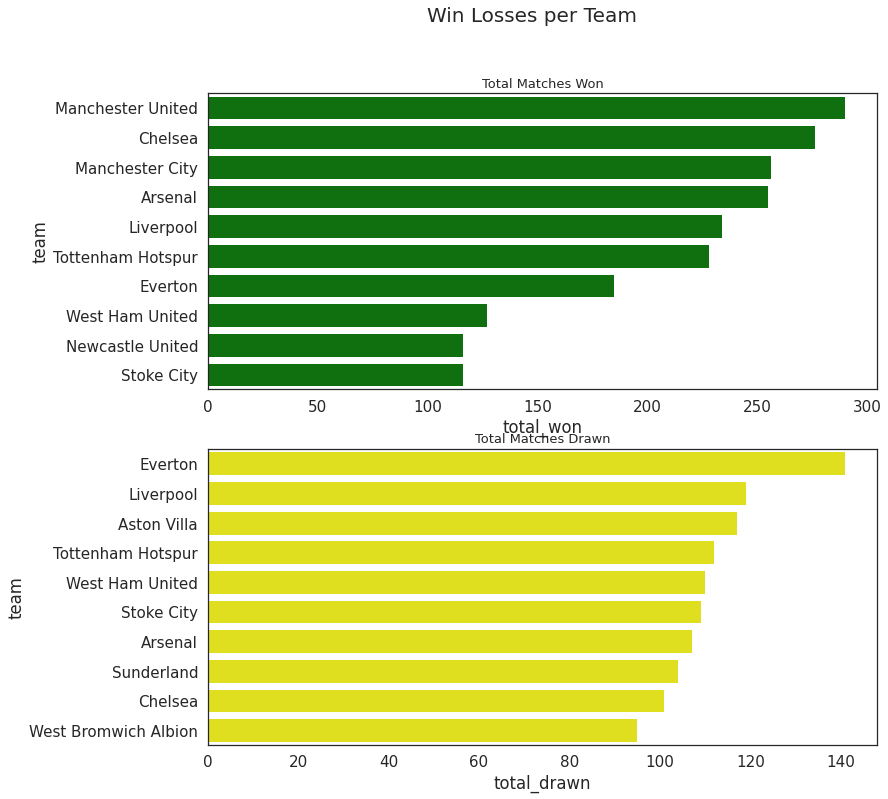

In [83]:
sns.set_style('white')

fig, ax = plt.subplots(2, 1, figsize=(12,12))

fig.suptitle("Win Losses per Team", fontsize=20)
sns.barplot(data=games_win_loss_df\
                .sort_values('total_won', ascending=False).head(10),\
            y="team", x="total_won", orient='h', color="green", ax=ax[0])
ax[0].set_title("Total Matches Won", fontsize=13)

sns.barplot(data=games_win_loss_df\
                .sort_values('total_drawn', ascending=False).head(10),\
            y="team", x="total_drawn", orient='h', color="yellow", ax=ax[1])
ax[1].set_title("Total Matches Drawn", fontsize=13)

**Man United, City & Chelsea** - won the most games according to our data

**Everton, Liverpool & Villa** - drew the most games

&rarr;  *WINNING TEAMS for each season*

In [84]:
season_list = ['2006-2007', '2007-2008', '2008-2009', '2009-2010', '2010-2011', '2011-2012', '2012-2013',\
               '2013-2014', '2014-2015', '2015-2016', '2016-2017', '2017-2018']
winner_list = ['Manchester United', 'Manchester United', 'Manchester United', 'Chelsea', 'Manchester United',\
              'Manchester City', 'Manchester United', 'Manchester City', 'Chelsea', 'Leicester City', 'Chelsea',\
              'Manchester City']
epl_winner_data = pd.DataFrame({'season': season_list, 'winner': winner_list})
print(epl_winner_data.to_markdown())

|    | season    | winner            |
|---:|:----------|:------------------|
|  0 | 2006-2007 | Manchester United |
|  1 | 2007-2008 | Manchester United |
|  2 | 2008-2009 | Manchester United |
|  3 | 2009-2010 | Chelsea           |
|  4 | 2010-2011 | Manchester United |
|  5 | 2011-2012 | Manchester City   |
|  6 | 2012-2013 | Manchester United |
|  7 | 2013-2014 | Manchester City   |
|  8 | 2014-2015 | Chelsea           |
|  9 | 2015-2016 | Leicester City    |
| 10 | 2016-2017 | Chelsea           |
| 11 | 2017-2018 | Manchester City   |


Text(0, 0.5, 'TEAM')

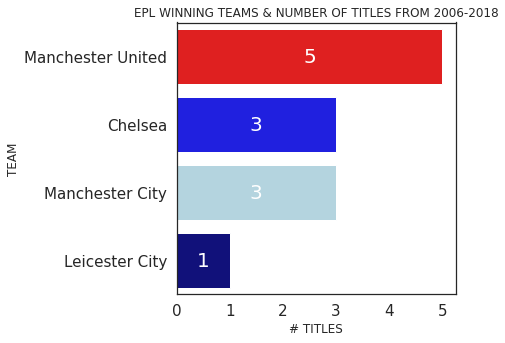

In [85]:
## Teams who won the most

plot_winners_df = epl_winner_data.groupby('winner').count()['season'].reset_index(name='num_titles')

colors = {'Chelsea': "blue", 'Leicester City': "darkblue", 'Manchester City': "lightblue", 'Manchester United': 'red'}

plt.figure(figsize=(5,5))
plt.title("EPL WINNING TEAMS & NUMBER OF TITLES FROM 2006-2018", fontsize=12)
ax = sns.barplot(data=plot_winners_df.sort_values('num_titles', ascending=False)\
            , y="winner", x="num_titles", orient='h', palette=colors)
ax.bar_label(ax.containers[0], label_type='center', color='white', fontsize=20)
plt.xlabel("# TITLES", fontsize=12)
plt.ylabel("TEAM", fontsize=12)

**Manchester United - 5** won the maximum titles in this period
followed by **Chelsea - 3**, **Manchester City - 3** & **Leicester City - 1**

United, City & Chelsea won most games which is reflected in number of titles too.

**<u>WINNING MARGIN</u>**

Following I calculate winning margin using **stats_df**. I use SQL on Pandas DF to achieve this as writing window functions is very convinient in SQL than in Pandas Syntax.

In [86]:
import pandasql as ps

stats_df['points'] = stats_df.wins*3 + (38 - (stats_df.losses + stats_df.wins))*1

q1 = """
with q1_df as 
(select 
    sdf.*,
    row_number() over (partition by season order by points desc) as final_position,
    lag(points, 1) over (partition by season order by points desc) as prev_position_points,
    lag(team, 1) over (partition by season order by points desc) as prev_team
from stats_df sdf),
q2_df as (select
    q1df.*,
    q1df.prev_position_points - q1df.points as winning_margin
from q1_df q1df
where final_position = 2)
select 
    season, team as second_pos_team, prev_team as winning_team, winning_margin
from q2_df q2df;
"""

df_q1 = ps.sqldf(q1, locals())
df_q1.head(5)

,season,second_pos_team,winning_team,winning_margin
0,2006-2007,Chelsea,Manchester United,6.0
1,2007-2008,Chelsea,Manchester United,2.0
2,2008-2009,Liverpool,Manchester United,4.0
3,2009-2010,Manchester United,Chelsea,1.0
4,2010-2011,Chelsea,Manchester United,9.0


Text(0.5, 0.98, 'Winning Margin per season')

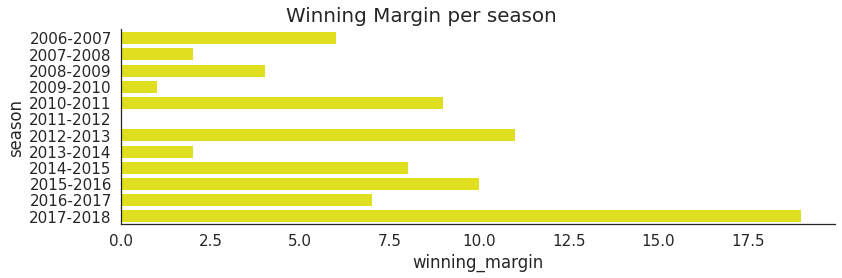

In [87]:
## Plotting winning margins

sns.set_style('white')
g = sns.catplot(data=df_q1, y="season", x="winning_margin", kind="bar",
            height=4, aspect=3, orient='h', color='yellow')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Winning Margin per season')

In [88]:
print("Avg. winning margin is", np.round(df_q1.winning_margin.mean(), 2), "points")
print("Median winning margin is", np.round(df_q1.winning_margin.median(), 2), "points")

Avg. winning margin is 6.58 points
Median winning margin is 6.5 points


We can see that in 2006-2012, the margins were lesser. In 2011-2012 margin was 0. In 2011-12, Manchester City & Manchester United had equal points so the winner was chosen based on the GOAL DIFFERENCE.

In the latter parts, winning margins have increased to > 7 points with the last season seeing the highest margin of 18+ points won by Manchester City.

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 150%;
           border-radius:5px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
What differentiates Top 4 teams
<a class="anchor" id="4"></a>

**<u>Goal: Identify important indicators of teams ending in top 4 spots</u>**

**<u>Potential KPIs:</u>** 

Following are the potential KPIs we could use as a measure of a successful performance for a team

* percent top 4: percent of teams falling in top 4 spots at the end of the season
* points: points earned in a season
* win percent per season: team performance measure
* goals: measuring attack efficiency
* goals conceded: measuring defensive efficiency

**<u>KPI 1. Percent Top 4</u>**

Lets look at the first KPI which is **how many Top4% teams end up in which categories of various categorical variables.**

As most features are float in stats_df, we will start by binning them and converting them to categorical features.

Lets start by visualizing two categorical features at a time and compare the **Top4%** metric on them.

In [89]:
## TWO CATEGORY PLOTS
            
def get_two_category_plot(features, stats_df, palette_val):
    
    var1 = features[0]
    var2 = features[1]
    Q_stats_df_with_positions = """
    with q1_df as 
    (select 
        sdf.*,
        row_number() over (partition by season order by points desc) as final_position,
        lag(points, 1) over (partition by season order by points desc) as prev_position_points,
        lag(team, 1) over (partition by season order by points desc) as prev_team
    from stats_df sdf)
    select *
    from q1_df as q1df;
    """
    stats_df_with_positions = ps.sqldf(Q_stats_df_with_positions, locals())
    quartile_df = pd.DataFrame({'season': stats_df_with_positions['season'],\
                               'team': stats_df_with_positions['team'],\
                               'final_position': stats_df_with_positions['final_position']})
    for feature in feature_list:
        quartile_df['binned_' + feature] = pd.qcut(stats_df_with_positions[feature], \
                                                   q=[0, .33, .66, 1.],\
                                                   #labels=['Low', 'Med', 'High'],\
                                                  duplicates='drop')
    quartile_df_gb_cols = [i for i in quartile_df.columns.tolist() if i not in ['team', 'final_position']]
    convert_to_object_cols = quartile_df.columns[quartile_df.dtypes=="category"].tolist()
    for col in convert_to_object_cols:
        quartile_df[col] = quartile_df[col].astype('str')
    quartile_df = quartile_df.reset_index(drop=True)
    quartile_df_gb_cols=[i for i in quartile_df.columns.tolist() if i not in ['team', 'final_position']]

    Q_quartile_binning = '''
    select ''' + ','.join(quartile_df_gb_cols) + ''',
        count(distinct team) as num_teams,
        sum(case when final_position in (1,2,3,4) then 1 else 0 end) as num_top4,
        avg(final_position) as avg_final_position
    from quartile_df qdf
    group by ''' + ','.join(quartile_df_gb_cols)

    quartile_df_v2 = ps.sqldf(Q_quartile_binning, locals())
    quartile_df_v2['%Top4'] = 100*(np.round(quartile_df_v2['num_top4']/quartile_df_v2['num_teams'], 2))
    
    sns.set(font_scale=1.2, style='whitegrid')
    g = sns.relplot(data=quartile_df_v2, x='season', y='%Top4', hue='binned_' + var1,\
                col='binned_' + var2, palette=palette_val, s=200)
    g.set_xticklabels(rotation=45)

**<u>Features: Red & Yellow Cards</u>**

We can see that when total yellow cards are high (BLUE DOTS),%Top4 is 0 i.e. it is very difficult to get into Top4 in any season. Probability of landing in Top4 hugely increases when YELLOW CARDS are less or medium (GREEN & PINK dots).

This trend is seen accross the red card categories (1 graph for each category on the column)

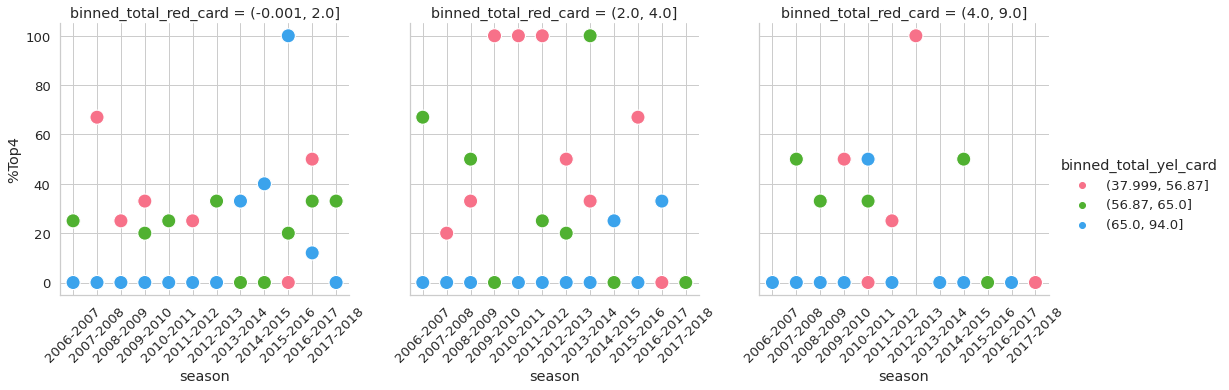

In [90]:
feature_list = ['total_yel_card', 'total_red_card']
get_two_category_plot(features=feature_list, stats_df=stats_df, palette_val="husl")

**<u>Features: Interception & Fast breaks (Counter attacks)</u>**

* In the right side plot, higher fastbreak goals have higher top4% teams which is expected.
* Although these fastbreak goals can come even if your interceptions are low, med or high - it doesn't matter unless your converting them, you are likely to end up in top4.
* Problem happens on the left plot when despite your interceptions being high (GREEN DOTS), you are unable to convert it into fastbreak goals.

Assumption: Fast Break goals = counter attack goals after interception

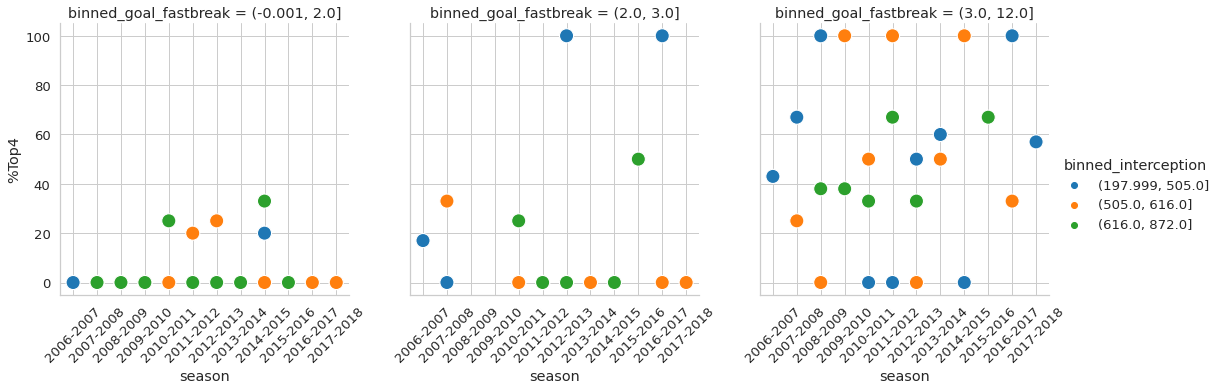

In [91]:
feature_list = ['interception', 'goal_fastbreak']
get_two_category_plot(features=feature_list, stats_df=stats_df, palette_val="tab10")

**<u>Features: Corners taken & Total Crosses</u>**

We can see there is clear correlation between **corners taken** and ending up in top 4 % at the end of the season. This can be seen from the GREEN DOTS which lie higher on the Y-axis on all 3 plots.

Similarly, teams taking **less corners** lie on the 0 line of the Y-axis in most cases. **CORNERS** are hence a fantastic indicator of whether a team will end up in top 4 %.

We can see a similar thing with **total crosses** moving from low to high from the left graph to the right. On the right graph we can see more dots rise up on the Y-axis which is our Top4% metric.



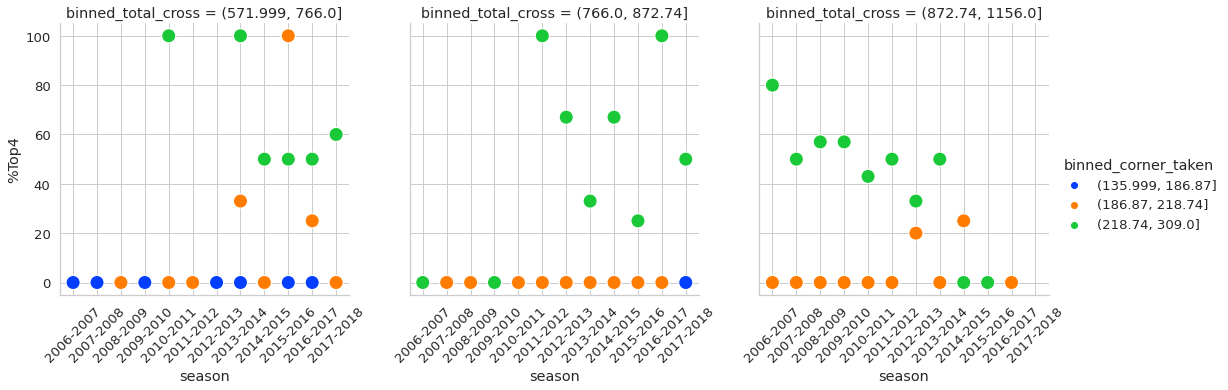

In [92]:
feature_list = ['corner_taken', 'total_cross']
get_two_category_plot(features=feature_list, stats_df=stats_df, palette_val="bright")

**<u>Features: Backward passes & Long Balls</u>**

If teams do lower long balls, they end in Top4% (LEFT PLOT). That means top teams reply more on through balls & field goals.

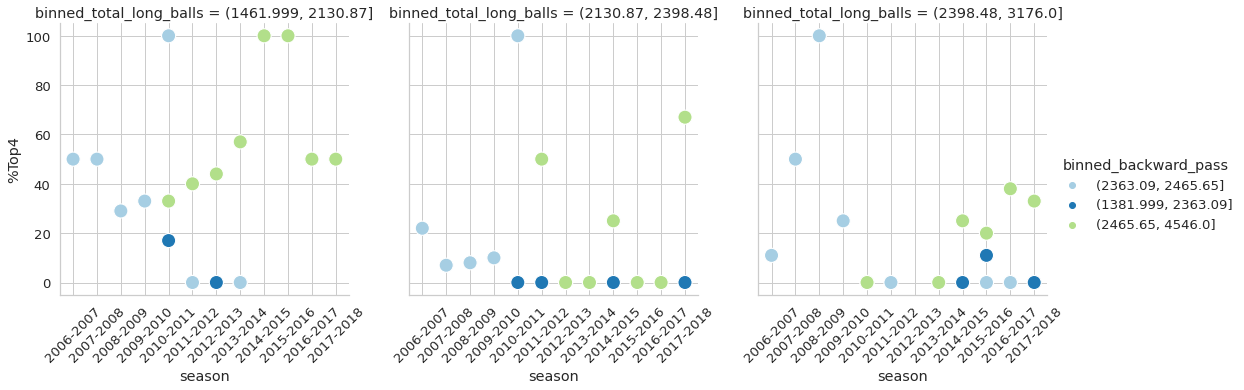

In [93]:
feature_list = ['backward_pass', 'total_long_balls']
get_two_category_plot(features=feature_list, stats_df=stats_df, palette_val="Paired")

**<u>Features: Through balls & Total passes</u>**

There is a clear correlation of both variables. There is an interaction effect too.

Lower total passes (left side plots) yeild lesser teams in Top 4 %.

Higher total passes ensure that the team ends up in Top 4 % as you have a higher control on the game and hence a higher probability to score goals.

Now within the higher passing teams, the more through balls you're able to get is even better to get into Top 4 %. This makes intuitive sense and the obvious is reflected in the data correctly.

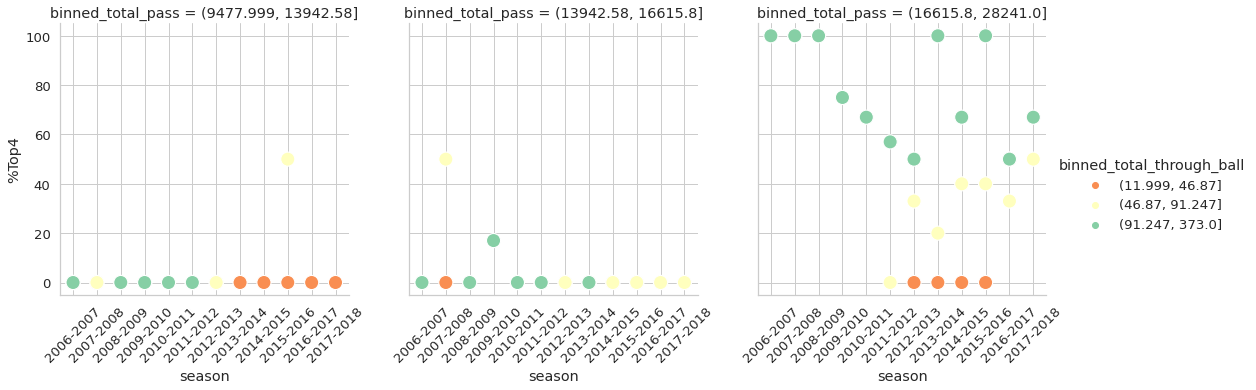

In [94]:
feature_list = ['total_through_ball', 'total_pass']
get_two_category_plot(features=feature_list, stats_df=stats_df, palette_val="Spectral")

**<u>Modelling & Feature Importance</u>**

It is a difficult task to plot every couple of features and check the effect on the target variable. Instead let us try to
1. Pick a good target variable
2. Create a data for modelling with relevant features
3. Run the models and work on model explainability

**<u>Target Variable</u>**

*Number of points scored in a season*

**<u>Features</u>**

*All applicable vars like corners taken, through balls etc.*

**<u>Model: Linear Regression</u>**

> Correlation plot

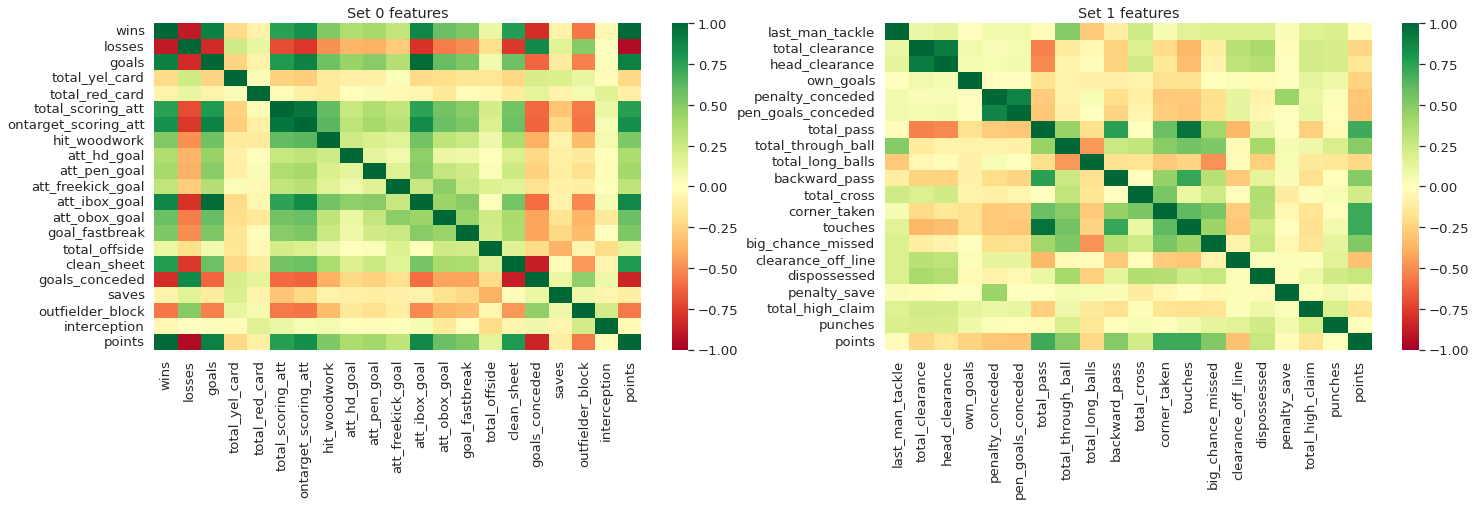

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Correlation plot
set_one = stats_df.columns[stats_df.dtypes == 'float64'][0:20].tolist() + ['points']
set_two = stats_df.columns[stats_df.dtypes == 'float64'][21:]
sets_list = [set_one, set_two]

fig, ax = plt.subplots(1, 2, figsize=(24,6))
for set in enumerate(sets_list):
    ax[set[0]].set_title("Set "+ str(set[0]) + ' features')
    sns.heatmap(stats_df[set[1]].corr(), vmin=-1, vmax=1, cmap='RdYlGn', ax=ax[set[0]])

* Bottom row of right picture shows features like **<i>total_pass, through_ball, backward_pass, total_cross, corner_taken, touches, big_chance_missed</i>** to be positively correlated with number of points.
* This shows that <u>possession and control over the ball</u> is extremely important. All these things when done persistently lead to goals.

In [96]:
# Taking all features except the very obvious ones like wins, losses
features = ['total_yel_card', 'total_red_card', 'total_scoring_att', 'ontarget_scoring_att', 'hit_woodwork',\
           'att_hd_goal', 'att_pen_goal', 'att_freekick_goal', 'att_ibox_goal', 'att_obox_goal', 'goal_fastbreak',\
           'total_offside', 'clean_sheet', 'saves', 'outfielder_block', 'interception', 'last_man_tackle',\
           'total_clearance', 'head_clearance', 'total_pass', 'total_through_ball', 'total_long_balls', \
           'backward_pass', 'total_cross', 'corner_taken', 'touches', 'big_chance_missed', 'dispossessed']

In [97]:
# Linear Regression statsmodel

X_train, X_test, y_train, y_test = train_test_split(stats_df[features], stats_df['points'], train_size=0.9, random_state=123)

statsmodel_ols = sm.OLS(y_train,X_train).fit()
print(statsmodel_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                 points   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              867.4
Date:                Wed, 25 Jan 2023   Prob (F-statistic):                   2.80e-183
Time:                        08:37:19   Log-Likelihood:                         -644.31
No. Observations:                 216   AIC:                                      1345.
Df Residuals:                     188   BIC:                                      1439.
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

* We can see due to heavy correlation with some features, R-Squared is extremely high 99% and so is F-value.
* With respect to individual feature tests, following features have a definite effect on the points at the end of the season
    - att_ibox_goal (Coeff - 0.59)
    - att_obox_goal (Coeff - 0.77)
    - clean_sheet (Coeff - 1.66)
    - head_clearance (Coeff - 0.01)
    
**<u>Residuals vs. Fitted plot</u>**

As expected, since the linearity relationship is good, the plot is free of major problems like non-constant variance or non-linearity

Text(0, 0.5, 'Residuals')

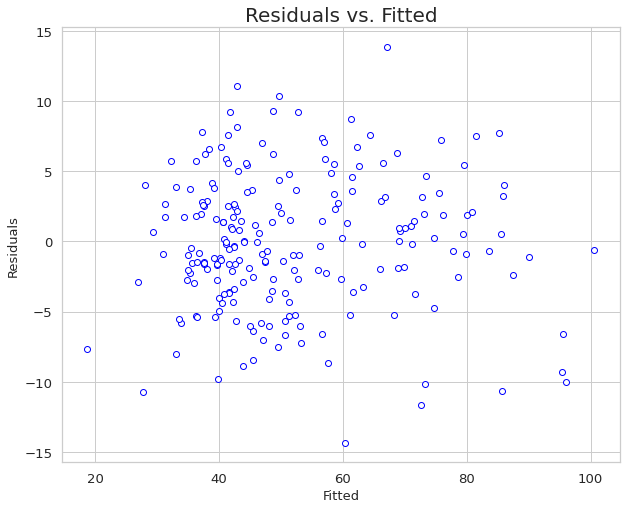

In [98]:
y_hat_train = statsmodel_ols.predict(X_train.astype(float))
resid_train = y_train - y_hat_train

plt.figure(figsize=(10,8)) 
plt.scatter(y_hat_train, resid_train, edgecolor='blue', c='white')
plt.grid(visible=True)
plt.title("Residuals vs. Fitted", fontsize=20)
plt.xlabel("Fitted", fontsize=13)
plt.ylabel("Residuals", fontsize=13)

In [99]:
from eli5 import show_prediction, show_weights

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
show_weights(lr_model, feature_names = X_train.columns.tolist())

Weight?,Feature
+1.668,clean_sheet
+0.793,att_obox_goal
+0.592,att_ibox_goal
+0.186,goal_fastbreak
+0.131,total_red_card
+0.083,last_man_tackle
+0.062,total_yel_card
+0.056,ontarget_scoring_att
+0.056,att_freekick_goal
+0.049,att_hd_goal


<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 150%;
           border-radius:5px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Goal Analysis
<a class="anchor" id="5"></a>

> As we see above, 3 top features out of 4 are kinds of *goals* scored. So let us do some analysis on this and see the characteristics of goals scored by top 4 teams vs. others

> First we will derive a target variable indicating that a row in **stats_df** is one that indicates a top 4 team for that particular season




In [100]:
# Getting a flag that indicates Top 4 team for a particular season
# Filtering only goal variables (different kinds of goals scored)

Q_stats_df_with_positions = """
    with q1_df as 
    (select 
        sdf.*,
        row_number() over (partition by season order by points desc) as final_position,
        lag(points, 1) over (partition by season order by points desc) as prev_position_points,
        lag(team, 1) over (partition by season order by points desc) as prev_team
    from stats_df sdf)
    select *
    from q1_df as q1df;
    """
stats_df_with_positions = ps.sqldf(Q_stats_df_with_positions, locals())
stats_df_with_positions['top_4_flag'] = np.where(stats_df_with_positions['final_position'] <= 4, 1, 0)

goal_vars = [i for i in stats_df.columns if i.find('goal') != -1] + ['final_position', 'top_4_flag', 'points', 'season']
stats_df_goals = stats_df_with_positions[goal_vars]
stats_df_goals.head()

,goals,att_hd_goal,att_pen_goal,att_freekick_goal,att_ibox_goal,att_obox_goal,goal_fastbreak,goals_conceded,own_goals,pen_goals_conceded,final_position,top_4_flag,points,season
0,83.0,12.0,5.0,1.0,72.0,11.0,9.0,27.0,1.0,3.0,1,1,89.0,2006-2007
1,64.0,16.0,3.0,6.0,41.0,23.0,6.0,24.0,1.0,2.0,2,1,83.0,2006-2007
2,57.0,8.0,6.0,1.0,46.0,11.0,3.0,27.0,0.0,1.0,3,1,68.0,2006-2007
3,63.0,10.0,10.0,3.0,53.0,10.0,7.0,35.0,1.0,3.0,4,1,68.0,2006-2007
4,57.0,5.0,6.0,2.0,44.0,13.0,9.0,54.0,2.0,6.0,5,0,60.0,2006-2007


> We can see a few goal columns have an intersection of individual goals. Ex: In box goals are 72 in first row. That will also include Penalty goals & Headers (att_hd_goal).

> Total goals is the sum of In box goals & Out of the box goals only

<AxesSubplot:xlabel='final_position', ylabel='pen_goals_conceded'>

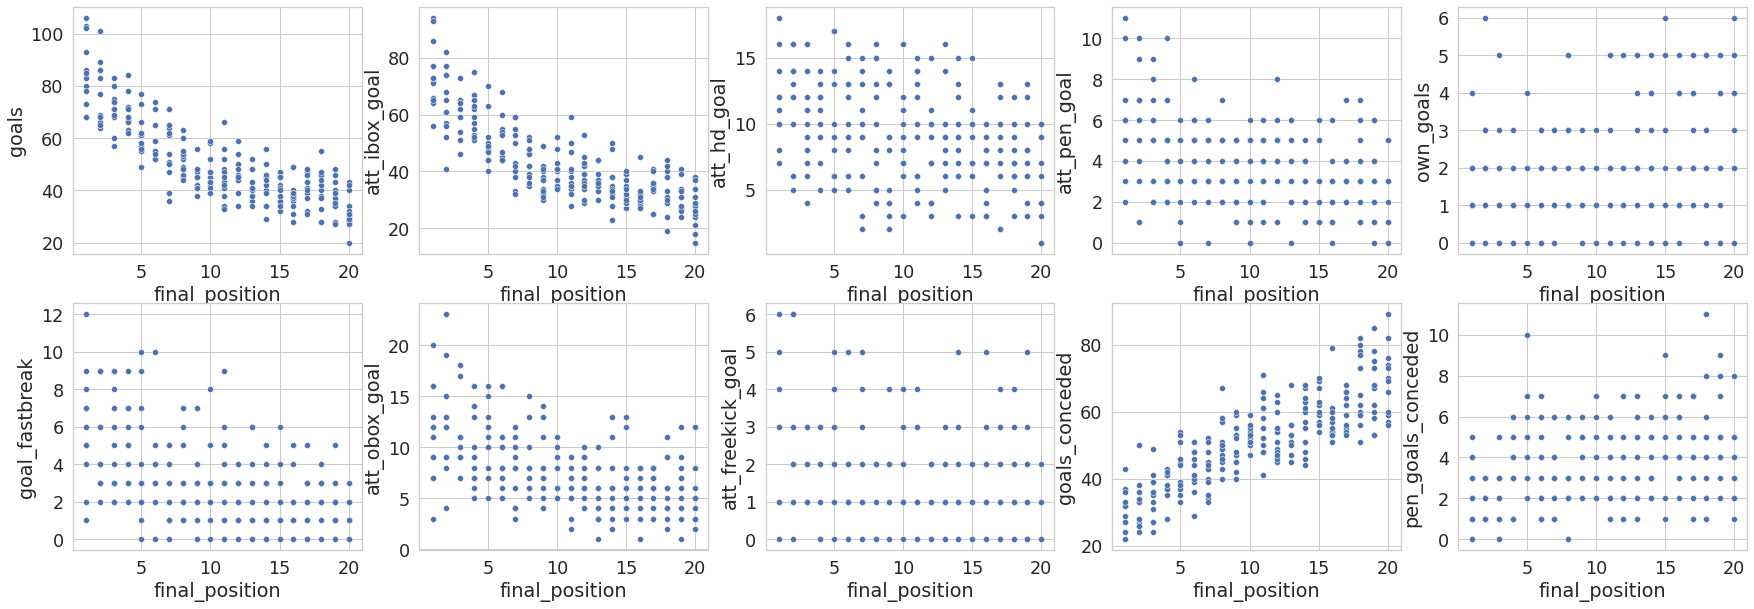

In [101]:
sns.set(font_scale=1.6, style='whitegrid')
fig, ax = plt.subplots(2, 5, figsize=(30, 10))

sns.scatterplot(data=stats_df_goals, x='final_position', y='goals', ax=ax[0,0])
sns.scatterplot(data=stats_df_goals, x='final_position', y='att_ibox_goal', ax=ax[0,1])
sns.scatterplot(data=stats_df_goals, x='final_position', y='att_hd_goal', ax=ax[0,2])
sns.scatterplot(data=stats_df_goals, x='final_position', y='att_pen_goal', ax=ax[0,3])
sns.scatterplot(data=stats_df_goals, x='final_position', y='own_goals', ax=ax[0,4])
sns.scatterplot(data=stats_df_goals, x='final_position', y='goal_fastbreak', ax=ax[1,0])
sns.scatterplot(data=stats_df_goals, x='final_position', y='att_obox_goal', ax=ax[1,1])
sns.scatterplot(data=stats_df_goals, x='final_position', y='att_freekick_goal', ax=ax[1,2])
sns.scatterplot(data=stats_df_goals, x='final_position', y='goals_conceded', ax=ax[1,3])
sns.scatterplot(data=stats_df_goals, x='final_position', y='pen_goals_conceded', ax=ax[1,4])

> X-axis has position the team ended up in at the end of the season. Y-axis has different goal variables (inside the box, outside the box, penalty, freekick etc.)

> Top left qudrant of each plot represents teams ending in top 10 & teams having a high y-variable value.

> Goals and In box goals have a definite correlation with the position team ends up in at the end of the season.

**<u><font size="3"> Comparing averages of goal columns for Top 4 teams vs. Others </font></u>**

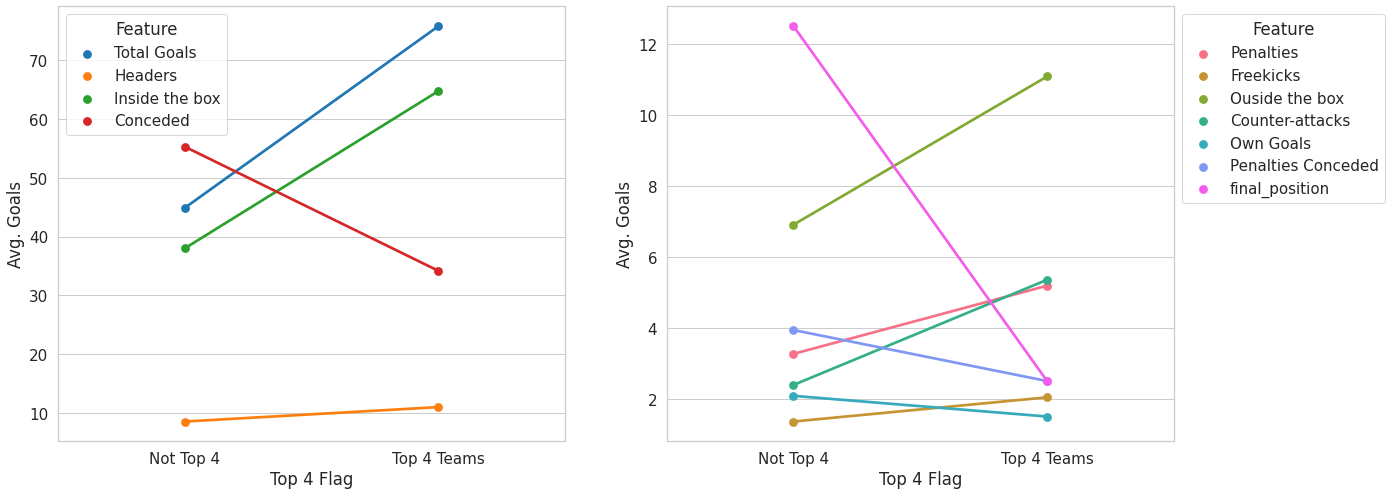

In [102]:
# Plotting averages of goal columns for teams that ENDED IN TOP 4 vs. ONES WHICH DID NOT END
df_v1 = stats_df_goals.groupby('top_4_flag').mean().reset_index()
df_v1.rename(columns={'goals': 'Total Goals', 'att_hd_goal': 'Headers', 'att_pen_goal': 'Penalties', \
                     'att_freekick_goal': 'Freekicks', 'att_ibox_goal': 'Inside the box', 'att_obox_goal': 'Ouside the box',\
                     'goal_fastbreak': 'Counter-attacks', 'goals_conceded': 'Conceded', 'own_goals': 'Own Goals',\
                    'pen_goals_conceded': 'Penalties Conceded'}, inplace=True)
df_v1['top_4_flag_named'] = np.where(df_v1['top_4_flag']==1, 'Top 4 Teams', 'Not Top 4')
df_v2 = pd.melt(df_v1, id_vars=['top_4_flag_named'], value_vars=[i for i in df_v1.columns if i != 'top_4_flag'])
df_v2.rename(columns={'top_4_flag_named': 'Top 4 Flag', 'variable': 'Feature', 'value': 'Avg. Goals'}, inplace=True)

df_v3 = df_v2[df_v2['Feature'].isin(['Total Goals', 'Headers', 'Inside the box', 'Conceded'])].copy()
df_v4 = df_v2[~df_v2['Feature'].isin(['Total Goals', 'Headers', 'Inside the box', 'Conceded', 'points'])].copy()

sns.set(font_scale=1.38, style='whitegrid')
fig, ax = plt.subplots(1, 2, figsize=(20,8))

sns.pointplot(data=df_v3, x='Top 4 Flag', y='Avg. Goals', hue='Feature', palette='tab10', ax=ax[0])
#sns.move_legend(ax[0], "upper left", bbox_to_anchor=(1, 1))

sns.pointplot(data=df_v4, x='Top 4 Flag', y='Avg. Goals', hue='Feature', palette='husl', ax=ax[1])
sns.move_legend(ax[1], "upper left", bbox_to_anchor=(1, 1))

**<u><font size="3"> Important observations </font></u>**

* Total goals and inside the box goals have a huge difference in avgs when it comes to Top4 teams vs. others.
* Headed goals are not really super important. Top4 teams score similar amount as others.
* Counter attacking goals avg. for Top4 is high vs. others (5 vs. 2.2)
* Freekicks are not very important i.e. Top4 teams score only a little more freekicks on an avg.
* Top4 teams are good defensively, as they concede less goals on an avg.

> **<font size="3"> That means teams should focus on field goals than on freekicks & headers to get into Top 4 </font>**

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 150%;
           border-radius:5px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Defense analysis
<a class="anchor" id="6"></a>

In [103]:
defense_feats = ['total_yel_card', 'total_red_card', 'clean_sheet', 'goals_conceded', 'saves', 'outfielder_block',\
                'interception', 'total_tackle', 'last_man_tackle', 'total_clearance', 'head_clearance',\
                'clearance_off_line', 'dispossessed']

stats_df_def = stats_df_with_positions[defense_feats + ['points', 'top_4_flag']].copy()
stats_df_def['Goals conceded category'] = pd.qcut(stats_df_def['goals_conceded'], q=[0, .33, .66, 1],\
                                            labels=['Low', 'Moderate', 'High'])

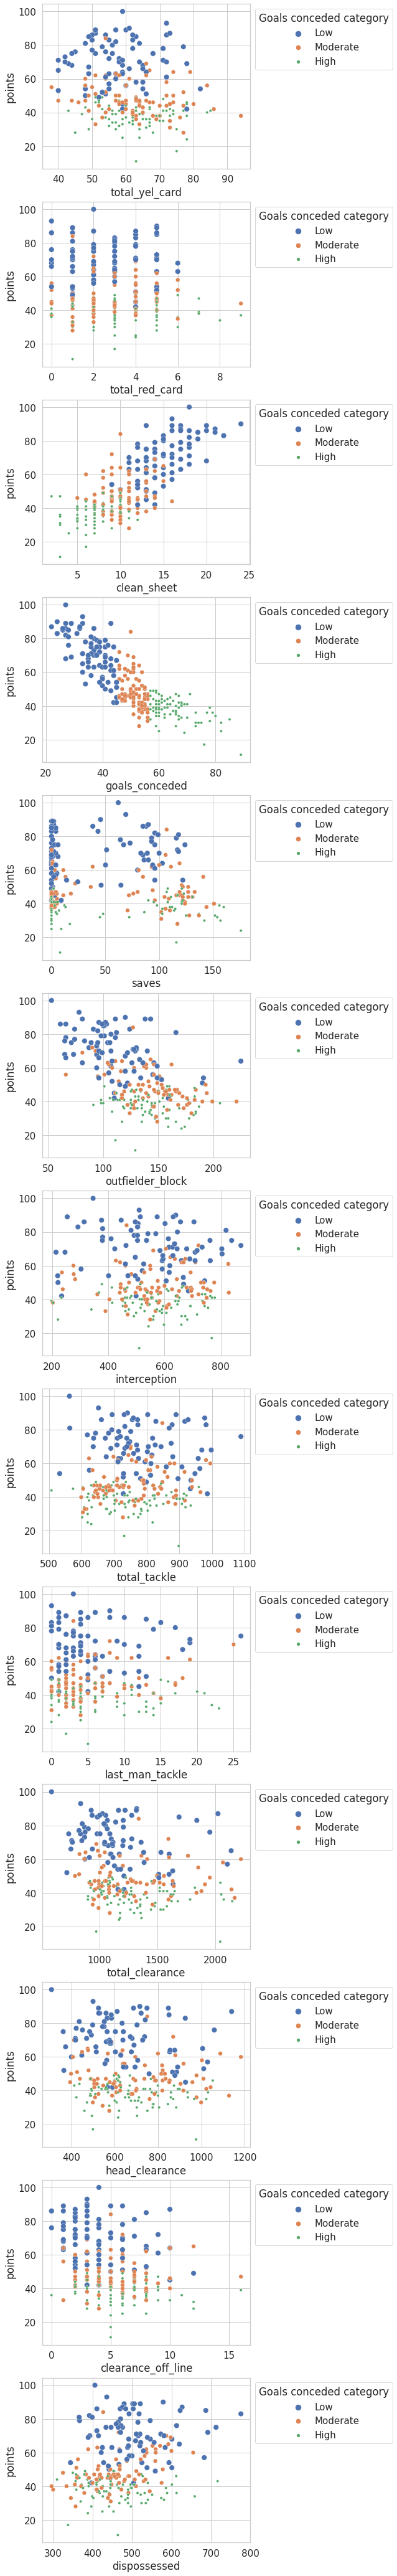

In [104]:
fig, ax = plt.subplots(13, 1, figsize=(6, 75))

for i in enumerate(defense_feats):
    sns.scatterplot(data=stats_df_def, x=i[1], y='points', hue='Goals conceded category',\
               size='Goals conceded category', ax=ax[i[0]])
    sns.move_legend(ax[i[0]], "upper left", bbox_to_anchor=(1, 1))